# Rock-Paper-Scissor Against Deterministic Policy

In [1]:
import sys 
sys.path.append("../src")
import numpy
import matplotlib.pyplot as plt
import LearningGames

## Create game

In [2]:
class RPS_vs_fixed:
    action_set={"R","P","S"}
    def __init__(self,fixed_action):
        """Create game

        Args:
            fixed_action: constant action for player 2
        """
        self.fixed_action=fixed_action
    def cost(self,p1_action,p2_action) -> float:
        """Returns game outcome

        Args:
            p1_action: action for player 1
            p2_action: action for player 2

        Returns:
            game result (float): -1 if player 1 wins, +1 if player 1 loses, 0 draw
        """
        if p1_action==p2_action:
            # draw
            return 0
        if (p1_action=="R" and p2_action=="S") or (p1_action=="P" and p2_action=="R") or (p1_action=="S" and p2_action=="P"):
            return -1
        else:
            return +1        
    def play(self,p1_action) -> tuple[float,dict[str,float]]:      
        """Play game

        Args:
            p1_action: action for player 1

        Returns: 
            tuple[float,dict(str,float)]
            cost (float): -1 if player 1 wins, +1 if player 1 loses, 0 draw
            all_costs (dict[str,float]): dictionary with costs for all actions of player 1
        """
        # select action for player 2
        p2_action=self.fixed_action
        # cost for given action of player 1
        cost=self.cost(p1_action,p2_action)
        # costs for all actions of player 1
        all_costs={a:self.cost(a,p2_action) for a in self.action_set}
        return (cost,all_costs)

## Create LearningGame object

+ Against a static player, we can use `gamma=0`
+ Against a deterministic player, the temperature can be quite low. This will result in very fast learning.

In [3]:
game=RPS_vs_fixed("P")
lg=LearningGames.LearningGame(game.action_set,
                              gamma=0.0,inverse_temperature=.1,seed=0);

## Simulate game

In [4]:
lg.reset()
M = 100
costs=numpy.zeros(M)
for iter in range(M):
    # Play
    action=lg.get_action(None)
    (costs[iter],all_costs)=game.play(action)
    # Learn
    lg.update_energies(None, all_costs)
    # output
    if iter<10:
        print("iter={:4d}, action = {:s}, cost = {:2.0f}, rewards = {:s}".format(iter,action,costs[iter],str(all_costs)))
    #print(lg.energy)
lg.get_regret(display=True);

iter=   0, action = S, cost = -1, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   1, action = R, cost =  1, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   2, action = R, cost =  1, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   3, action = R, cost =  1, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   4, action = P, cost =  0, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   5, action = P, cost =  0, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   6, action = S, cost = -1, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   7, action = P, cost =  0, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   8, action = S, cost = -1, rewards = {'R': 1, 'S': -1, 'P': 0}
iter=   9, action = P, cost =  0, rewards = {'R': 1, 'S': -1, 'P': 0}
  number_updates =           100  alpha1       =      1.103331  alpha0       =      0.203515
  minimum_cost   =     -1.000000  average_cost =     -0.885088  cost_bound   =     -0.878787
                                  regret       =      0.114912  regret_bound =      0.121213


## Plot results

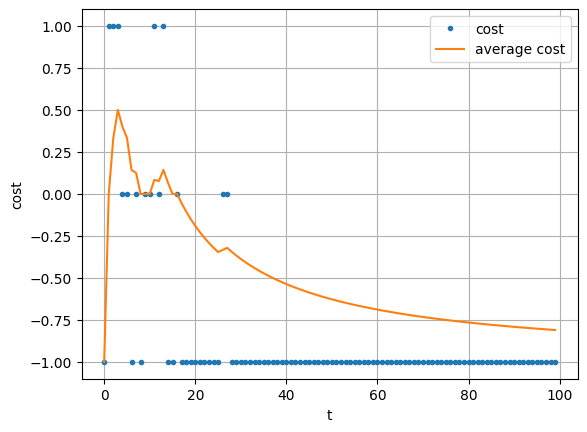

In [5]:
fig=plt.figure()
plt.plot(range(M),costs,'.',label='cost')
plt.plot(range(M),numpy.divide(numpy.cumsum(costs),numpy.add(range(M),1)),'-',label='average cost')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('cost');